In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category = DeprecationWarning)

pd.set_option("display.max_colwidth",200)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('avocado.csv',index_col=0)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


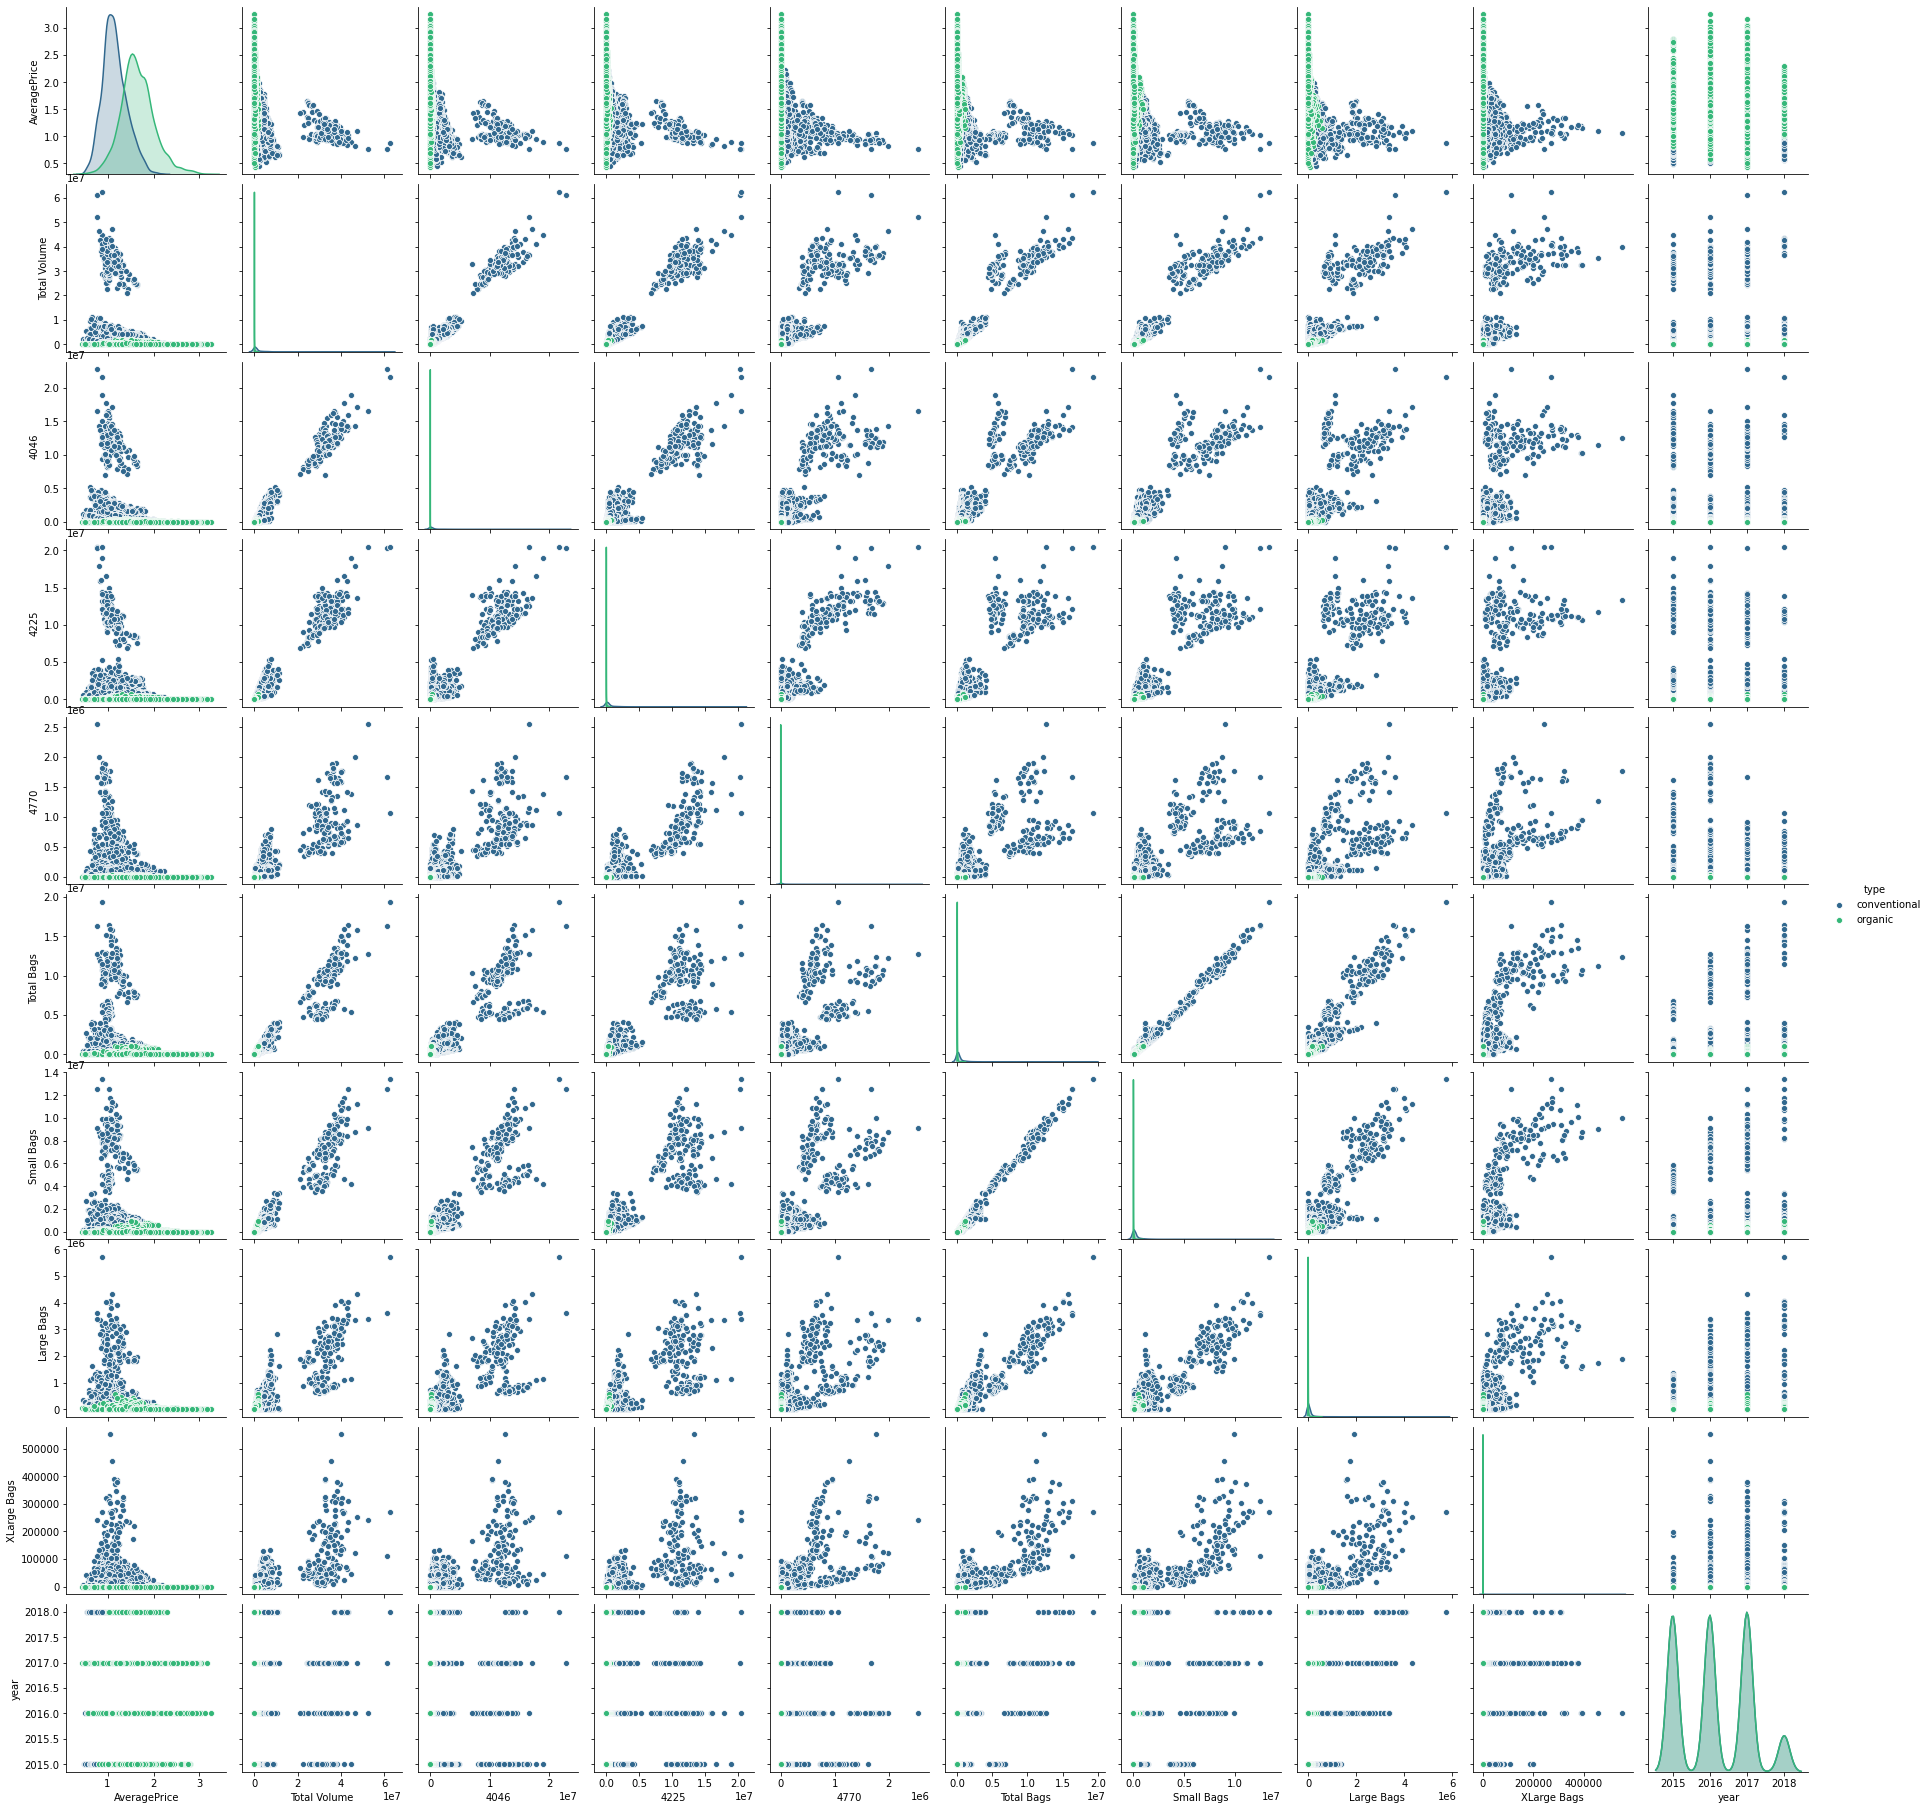

In [5]:
sns.pairplot(df,hue='type',palette='viridis')

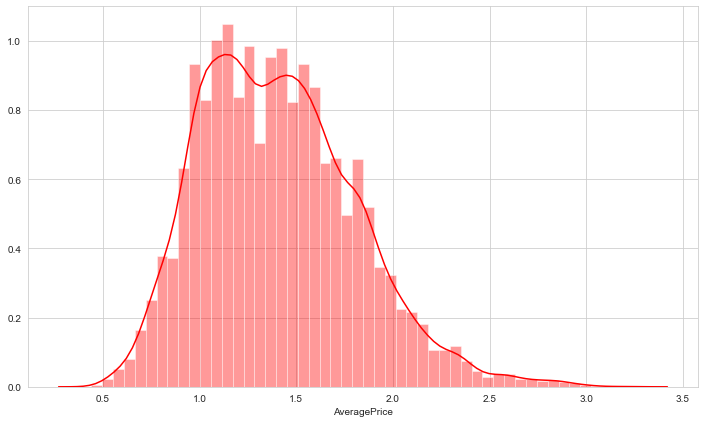

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))
sns.distplot(df['AveragePrice'],color='r')

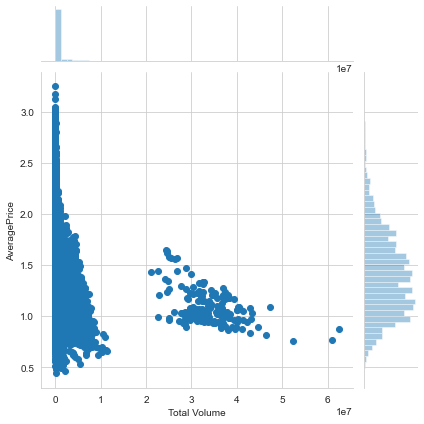

In [8]:
sns.jointplot(y='AveragePrice',x='Total Volume',data=df)

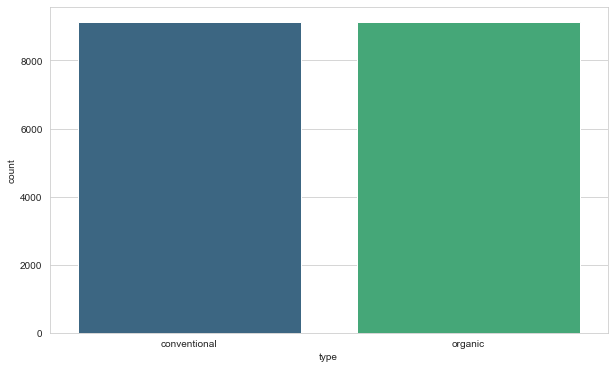

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='type',data=df,palette='viridis')

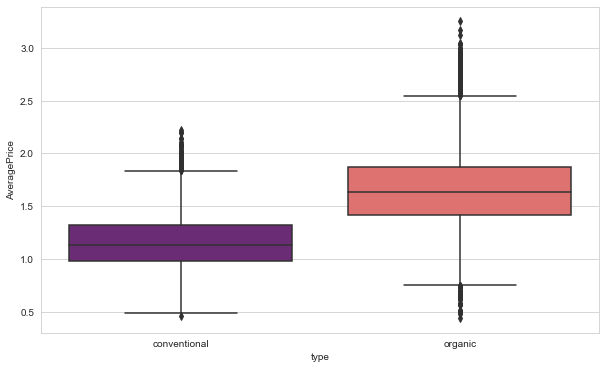

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x='type',y='AveragePrice',data=df,palette='magma')

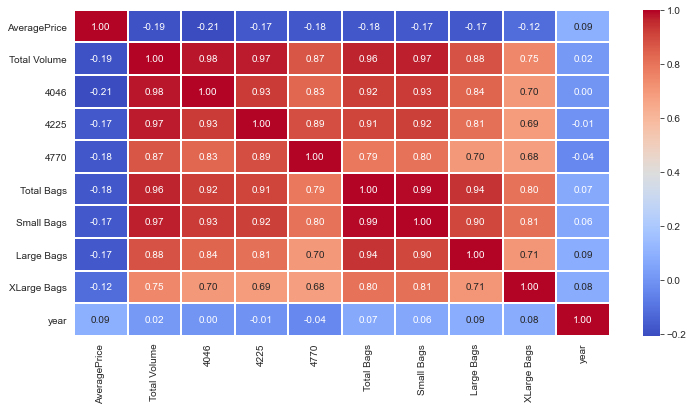

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',linewidths=1,annot=True,fmt=".2f")

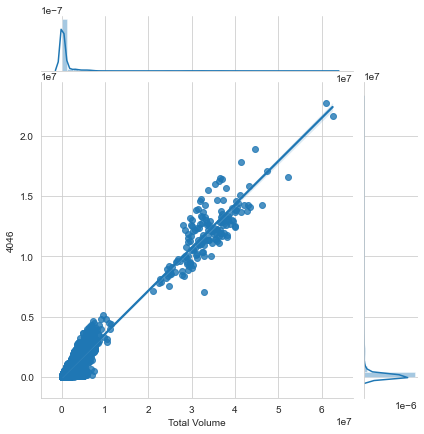

In [12]:
sns.jointplot(x='Total Volume',y='4046',data=df,kind='reg')

In [13]:
df[df['type']=='organic'].groupby('region')['type'].count().head()

region
Albany                 169
Atlanta                169
BaltimoreWashington    169
Boise                  169
Boston                 169
Name: type, dtype: int64

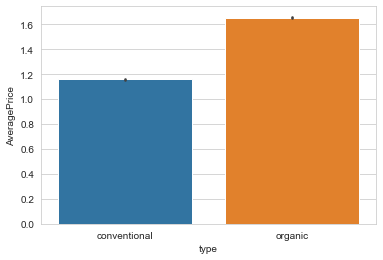

In [14]:
sns.barplot(x='type',y='AveragePrice',data=df)

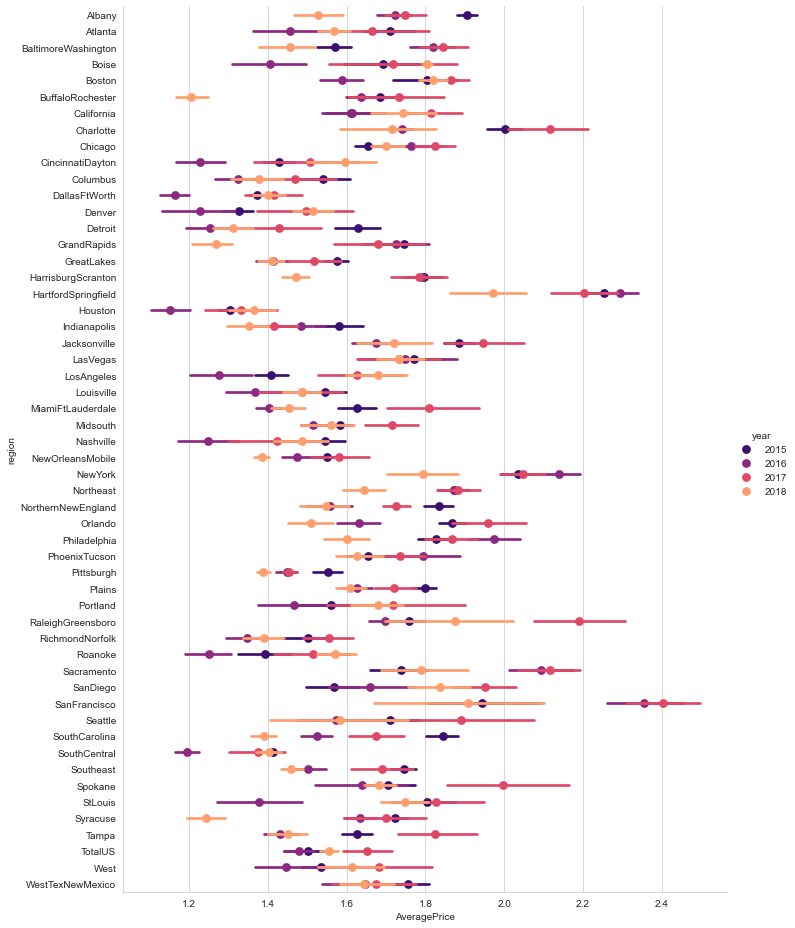

In [15]:
g = sns.catplot('AveragePrice','region',data=df[df['type']=='organic'],hue='year',
                height=13,aspect=0.8,palette='magma',
                kind='point',
                join=False
               )

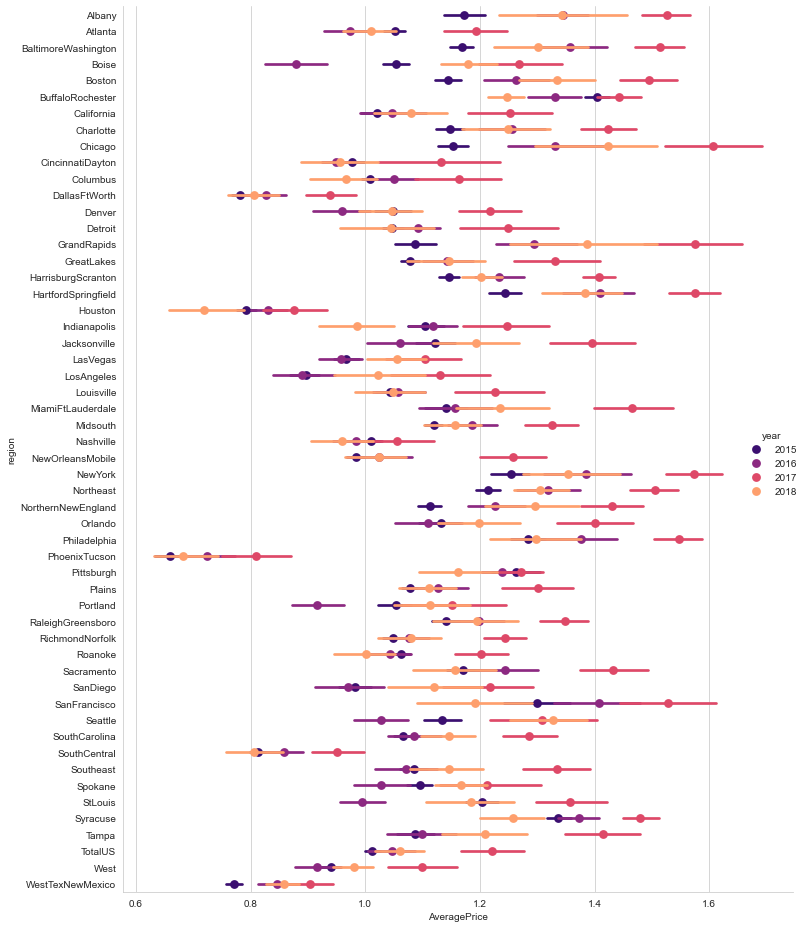

In [16]:
mask = df['type']=='conventional'
g = sns.catplot('AveragePrice','region',data=df[mask],
                   hue='year',
                   height=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
                   kind='point'
              )
plt.tight_layout()

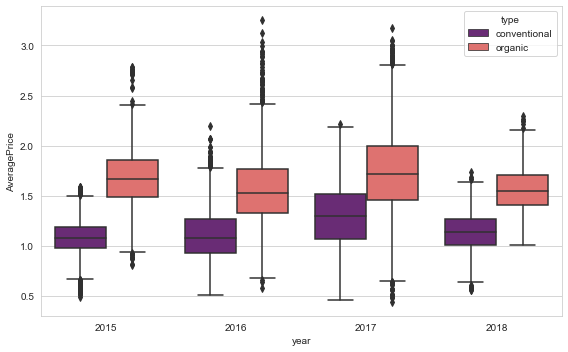

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(y='AveragePrice',x='year',hue = 'type',data=df, palette="magma")
plt.tight_layout()

In [18]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [19]:
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In [20]:
X = df.drop(['type','Date','region'], axis=1)
y = df['type']

In [21]:
# splitting the dataset into training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [22]:
# Applying Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Logistic Regression

In [23]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [24]:
y_pred = classifier.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix,classification_report

In [26]:
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

[[2009  224]
 [ 117 2213]]

              precision    recall  f1-score   support

conventional       0.94      0.90      0.92      2233
     organic       0.91      0.95      0.93      2330

    accuracy                           0.93      4563
   macro avg       0.93      0.92      0.93      4563
weighted avg       0.93      0.93      0.93      4563



In [27]:
# applying k-fold cross validation
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
accuracies

array([0.9138057 , 0.92037984, 0.91307524, 0.90504018, 0.91088386,
       0.92987582, 0.91520468, 0.9254386 , 0.9254386 , 0.92909357])

In [28]:
accuracies.mean()

0.9188236066792254

In [29]:
accuracies.std()

0.008011891162815756

In [30]:
# applying grid search
params = [{'penalty' : ['l2'], 'C' : [1,10,100,1000], 'tol' : [1,0.1,0.01,0.001,0.0001]},
          {'penalty' : ['elasticnet'], 'C' : [1,10,100,1000], 'tol' : [1,0.1,0.01,0.001,0.0001]}]

grid_Search = GridSearchCV(estimator=classifier, param_grid=params, scoring='accuracy', cv=10, n_jobs=-1)


In [31]:
grid_Search = grid_Search.fit(X_train,y_train)

In [32]:
grid_Search.best_score_

0.9449084041367115

In [33]:
grid_Search.best_params_

{'C': 1000, 'penalty': 'l2', 'tol': 1}

### SVC

In [34]:
svm = SVC(C=1, gamma='auto', kernel='rbf')
svm.fit(X_train,y_train)

SVC(C=1, gamma='auto')

In [35]:
# applying k-fold cross validation
accuracies = cross_val_score(estimator=svm, X=X_train, y=y_train, cv=10)
accuracies

array([0.93133674, 0.93060628, 0.92037984, 0.9247626 , 0.92695398,
       0.92987582, 0.93055556, 0.93640351, 0.94078947, 0.93347953])

In [36]:
accuracies.mean()

0.9305143336793409

In [37]:
accuracies.std()

0.005464558692996927

In [38]:
pred = svm.predict(X_test)

In [39]:
print(confusion_matrix(y_test,pred))
print("")
print(classification_report(y_test,pred))

[[1977  256]
 [  77 2253]]

              precision    recall  f1-score   support

conventional       0.96      0.89      0.92      2233
     organic       0.90      0.97      0.93      2330

    accuracy                           0.93      4563
   macro avg       0.93      0.93      0.93      4563
weighted avg       0.93      0.93      0.93      4563



In [40]:
#applyng grid search
params = [{'C' : [1,10,100,1000], 'kernel' : ['linear']},
          {'C' : [1,10,100,1000], 'kernel' : ['rbf'], 'gamma' : [1,0.1,0.01,0.001,0.0001]}]

grid_Search = GridSearchCV(estimator=svm, param_grid=params, scoring='accuracy', cv=10, n_jobs=-1)


In [41]:
grid_Search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(C=1, gamma='auto'), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [42]:
grid_Search.best_score_

0.981222687837197

In [43]:
grid_Search.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

### Decision Tree Classifier

In [44]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
pred_dt = dtree.predict(X_test)

In [46]:
print(confusion_matrix(y_test,pred_dt))

[[2196   37]
 [  30 2300]]


In [47]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

conventional       0.99      0.98      0.98      2233
     organic       0.98      0.99      0.99      2330

    accuracy                           0.99      4563
   macro avg       0.99      0.99      0.99      4563
weighted avg       0.99      0.99      0.99      4563



In [48]:
# Applying k-fold cross validation
accuracies = cross_val_score(estimator=dtree, X=X_train, y=y_train, cv=10)
accuracies

array([0.97589481, 0.98246896, 0.97954711, 0.98246896, 0.98758218,
       0.98027757, 0.98830409, 0.98976608, 0.98172515, 0.98318713])

In [49]:
accuracies.mean()

0.9831222047082644